In [431]:
import os
import pandas as pd
import csv

import function as f
import pandas as pd
import matplotlib.pyplot as plt

In [432]:
folder_name = "congestion"
file_name = "congestion.csv"
file_path = os.path.join(folder_name, file_name)
file_path

'congestion\\congestion.csv'

In [433]:
congestion_data_df = pd.read_csv(file_path)
congestion_data_df.head()

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305


In [434]:
test_data = congestion_data_df[:6]
test_data

,YT Num,Job Num,alpha1,alpha2,alpha3,Process Time of YC per container,Process Time of QC per container,Average of Congestion ratio
0,10,10,0,0,100,150s,150s,0.067422
1,20,20,0,0,100,150s,150s,0.137432
2,30,30,0,0,100,150s,150s,0.312250
3,40,40,0,0,100,150s,150s,0.334690
4,50,50,0,0,100,150s,150s,0.745305
5,60,60,0,0,100,150s,150s,0.738816


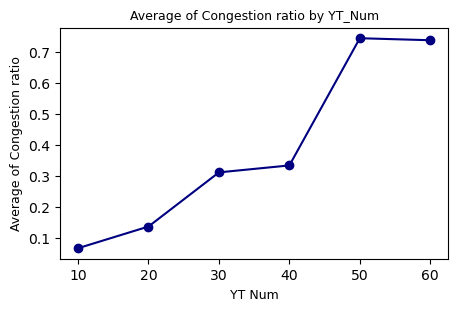

In [435]:

x_values = test_data['YT Num']
y_values = test_data['Average of Congestion ratio']

plt.figure(figsize=(5, 3))
# plt.scatter(test_data['YT Num'], test_data['Average of Congestion ratio'])
plt.plot(x_values, y_values , marker='o', linestyle='-', color = 'navy')
plt.title('Average of Congestion ratio by YT_Num', fontsize=9, ha='center')
plt.xlabel('YT Num', fontsize = 9)
plt.ylabel('Average of Congestion ratio', fontsize = 9)
plt.show()

In [436]:
def create_congestion_df(csv_data):
    columns = ['Truck_num'] + csv_data[0][1][0]


    data_list = []

    for file_name, file_data in csv_data:
        truck_num = file_name.split('_')[2]
        
        for row in file_data[1:]:
            # print(row)
            row[4:] = [float(value) for value in row[4:]]
            new_row = [truck_num] + row
            data_list.append(new_row)

    df = pd.DataFrame(data_list, columns=columns)
    return df

In [437]:
folder_name = 'congestion/prev_LP_0_20_80_together/'
congestion_all_csv_data = f.load_csv_files_in_folder(folder_name)

congestion_wt_df = create_congestion_df(congestion_all_csv_data)
congestion_wt_df.head()

,Truck_num,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,10,Truck-3,Route-3,(425.0 0.0 155.5),(375.0 0.0 200.0),343.188,7.656,30.544
1,10,Truck-4,Route-4,(675.0 0.0 205.5),(375.0 0.0 100.0),347.320,7.656,34.688
2,10,Truck-8,Route-8,(675.0 0.0 5.5),(625.0 0.0 200.0),359.644,7.656,47.004
3,10,Truck-6,Route-6,(175.0 0.0 -5.5),(625.0 0.0 200.0),363.304,17.516,40.804
4,10,Truck-9,Route-9,(675.0 0.0 55.5),(125.0 0.0 200.0),367.644,7.656,54.996


In [438]:
folder_name = 'congestion/prev_LP_0_20_80_onebyone/'
congestion_onebyone_all_csv_data = f.load_csv_files_in_folder(folder_name)

congestion_wot_df = create_congestion_df(congestion_onebyone_all_csv_data)
congestion_wot_df.head()


,Truck_num,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
0,10,Truck-0,Route-0,(175.0 0.0 105.5),(375.0 0.0 200.0),364.780,7.508,52.284
1,10,Truck-1,Route-1,(175.0 0.0 55.5),(375.0 0.0 50.0),398.392,38.876,54.520
2,10,Truck-2,Route-2,(425.0 0.0 55.5),(125.0 0.0 0.0),391.432,39.460,46.984
3,10,Truck-3,Route-3,(425.0 0.0 155.5),(375.0 0.0 200.0),342.392,7.000,30.404
4,10,Truck-4,Route-4,(675.0 0.0 205.5),(375.0 0.0 100.0),346.692,7.000,34.708


In [439]:
def merge_df(df1, df2):
    merged_df = pd.merge(df1, df2, on=['Truck_num', 'Truck_id'], suffixes=('_wt', '_wot'))
    return merged_df

In [440]:
# Merge the two dataframes on 'Truck_num' and 'Truck_id' columns
df = merge_df(congestion_wt_df, congestion_wot_df)

# Calculate the difference between 'Total Time' columns
df['Congestion ratio'] = (df['Total Time_wt'] - df['Total Time_wot'])/df['Total Time_wot']

df['Truck_num'].unique()

array(['10', '15', '20', '25', '30', '35', '40', '45', '55', '60'],
      dtype=object)

In [441]:
df.head()

,Truck_num,Truck_id,Route_id_wt,Origin_wt,Destination_wt,Total Time_wt,PickupSta AT_wt,DropSta AT_wt,Route_id_wot,Origin_wot,Destination_wot,Total Time_wot,PickupSta AT_wot,DropSta AT_wot,Congestion ratio
0,10,Truck-3,Route-3,(425.0 0.0 155.5),(375.0 0.0 200.0),343.188,7.656,30.544,Route-3,(425.0 0.0 155.5),(375.0 0.0 200.0),342.392,7.000,30.404,0.002325
1,10,Truck-4,Route-4,(675.0 0.0 205.5),(375.0 0.0 100.0),347.320,7.656,34.688,Route-4,(675.0 0.0 205.5),(375.0 0.0 100.0),346.692,7.000,34.708,0.001811
2,10,Truck-8,Route-8,(675.0 0.0 5.5),(625.0 0.0 200.0),359.644,7.656,47.004,Route-8,(675.0 0.0 5.5),(625.0 0.0 200.0),364.248,7.000,52.248,-0.012640
3,10,Truck-6,Route-6,(175.0 0.0 -5.5),(625.0 0.0 200.0),363.304,17.516,40.804,Route-6,(175.0 0.0 -5.5),(625.0 0.0 200.0),362.472,16.880,40.608,0.002295
4,10,Truck-9,Route-9,(675.0 0.0 55.5),(125.0 0.0 200.0),367.644,7.656,54.996,Route-9,(675.0 0.0 55.5),(125.0 0.0 200.0),367.172,7.004,55.184,0.001286


In [442]:
def draw_plot(_x_values, _y_values, _title_name, x_label, y_label):
    plt.figure(figsize=(5,3))
    plt.plot(_x_values, _y_values , marker='o', linestyle='-', color = 'navy')
    plt.title(_title_name, fontsize=9, ha='center')

    plt.xlabel(x_label, fontsize=9)
    plt.ylabel(y_label, fontsize=9)

    plt.grid(True)
    plt.show()

### travel time

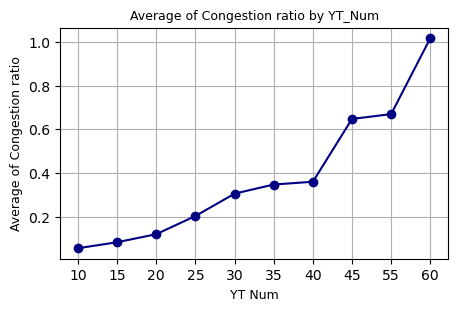

In [443]:
df_1 = df[['Truck_num', 'Truck_id', 'PickupSta AT_wt', 'PickupSta AT_wot', 'DropSta AT_wt', 'DropSta AT_wot', ]]
df_1['congestion_ratio_pick'] = (df_1['PickupSta AT_wt'] - df_1['PickupSta AT_wot'])/df_1['PickupSta AT_wot']
df_1['congestion_ratio_drop'] = (df_1['DropSta AT_wt'] - df_1['DropSta AT_wot'])/df_1['DropSta AT_wot']


df_2 = df_1.groupby('Truck_num')[['congestion_ratio_pick', 'congestion_ratio_drop']].mean()

df_2['congestion_ratio'] = df_2.mean(axis=1)
df_2['Truck_num'] = df_2.index
df_2.reset_index(drop=True, inplace=True)

x_value = df_2['Truck_num']
y_value = df_2['congestion_ratio']

draw_plot(x_value, y_value, 'Average of Congestion ratio by YT_Num', 'YT Num', 'Average of Congestion ratio')

### Total time

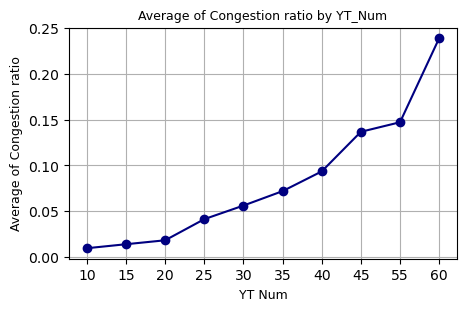

In [430]:
Totaltime_df = pd.DataFrame(df['Truck_num'].unique(), columns=['Truck_num'])
Totaltime_df['Congestion_ratio'] = df.groupby('Truck_num')['Congestion ratio'].mean().tolist()

x_value = Totaltime_df['Truck_num']
y_value = Totaltime_df['Congestion_ratio']

draw_plot(x_value, y_value, 'Average of Congestion ratio by YT_Num', 'YT Num', 'Average of Congestion ratio')